<Figure size 1200x1000 with 0 Axes>

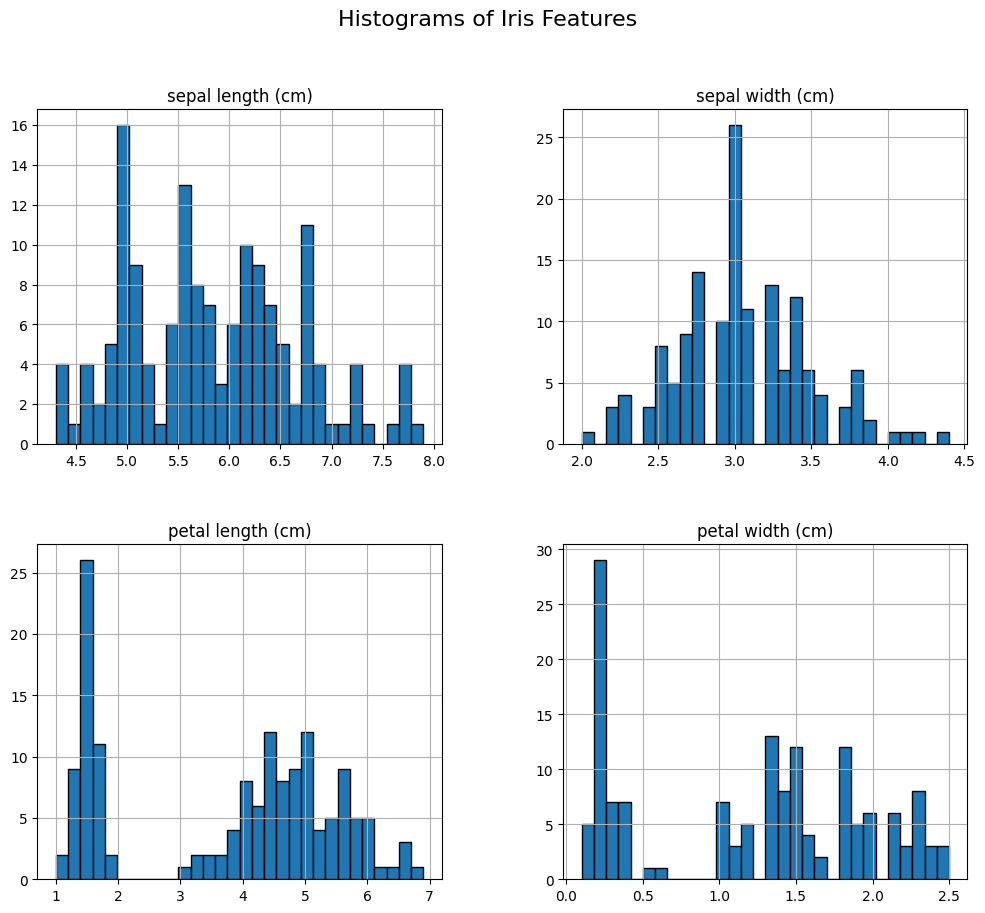

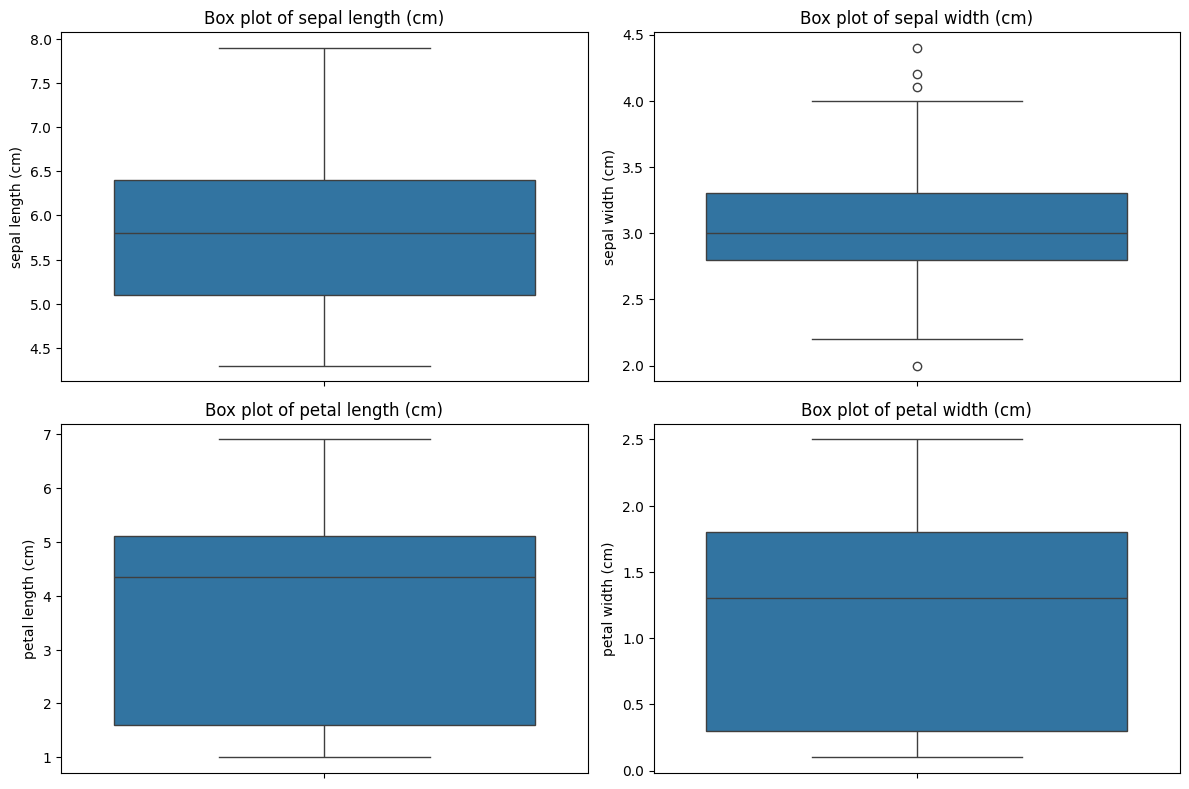

Outlier counts per feature:
sepal length (cm): 0 outliers
sepal width (cm): 4 outliers
petal length (cm): 0 outliers
petal width (cm): 0 outliers


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
plt.figure(figsize=(12, 10))
df.hist(bins=30, figsize=(12, 10), layout=(2, 2), edgecolor='black')
plt.suptitle("Histograms of Iris Features", fontsize=16)
plt.show()
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f"Box plot of {column}")
plt.tight_layout()
plt.show()
outliers = {}
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()
print("Outlier counts per feature:")
for feature, count in outliers.items():
    print(f"{feature}: {count} outliers")
